___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-1 (ANN)<br><br>Churn Prediction for Bank Customer<br><h1>

# Dataset Info

We have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

The features in the given dataset are:
- **rownumber:** Row Numbers from 1 to 10000.
- **customerid:** A unique ID that identifies each customer.
- **surname:** The customer’s surname.
- **creditscore:** A credit score is a number between 300–850 that depicts a consumer's creditworthiness.
- **geography:** The country from which the customer belongs to.
- **Gender:** The customer’s gender: Male, Female
- **Age:** The customer’s current age, in years, at the time of being customer.
- **tenure:** The number of years for which the customer has been with the bank.
- **balance:** Bank balance of the customer.
- **numofproducts:** the number of bank products the customer is utilising.
- **hascrcard:** The number of credit cards given to the customer by the bank.
- **isactivemember:** Binary Flag for indicating if the client is active or not with the bank before the moment where the client exits the company (recorded in the variable "exited")
- **exited:** Binary flag 1 if the customer closed account with bank and 0 if the customer is retained.

# Improt Libraries & Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
plt.rcParams["figure.figsize"] = (10, 6)
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import RocCurveDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
import pickle
from tensorflow.keras.models import load_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Uncomment the following lines if you want to suppress warnings:
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Set it to None to display all rows in the dataframe:
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe:
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv("./Churn_Modelling.csv")

# Exploratory Data Analysis and Visualization

1. Implement basic steps to see how is your data looks like
2. Check for missing values
3. Drop the features that not suitable for modelling
4. Implement basic visualization steps such as histogram, countplot, heatmap
5. Convert categorical variables to dummy variables

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.820,1,1,1,79084.100,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum().any()

False

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.000,5000.500,2886.896,1.000,2500.750,5000.500,7500.250,10000.000
CustomerId,10000.000,15690940.569,71936.186,15565701.000,15628528.250,15690738.000,15753233.750,15815690.000
CreditScore,10000.000,650.529,96.653,350.000,584.000,652.000,718.000,850.000
Age,10000.000,38.922,10.488,18.000,32.000,37.000,44.000,92.000
Tenure,10000.000,5.013,2.892,0.000,3.000,5.000,7.000,10.000
Balance,10000.000,76485.889,62397.405,0.000,0.000,97198.540,127644.240,250898.090
NumOfProducts,10000.000,1.530,0.582,1.000,1.000,1.000,2.000,4.000
HasCrCard,10000.000,0.706,0.456,0.000,0.000,1.000,1.000,1.000
IsActiveMember,10000.000,0.515,0.500,0.000,0.000,1.000,1.000,1.000
EstimatedSalary,10000.000,100090.240,57510.493,11.580,51002.110,100193.915,149388.247,199992.480


In [9]:
df.Exited.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

<Axes: xlabel='Exited', ylabel='count'>

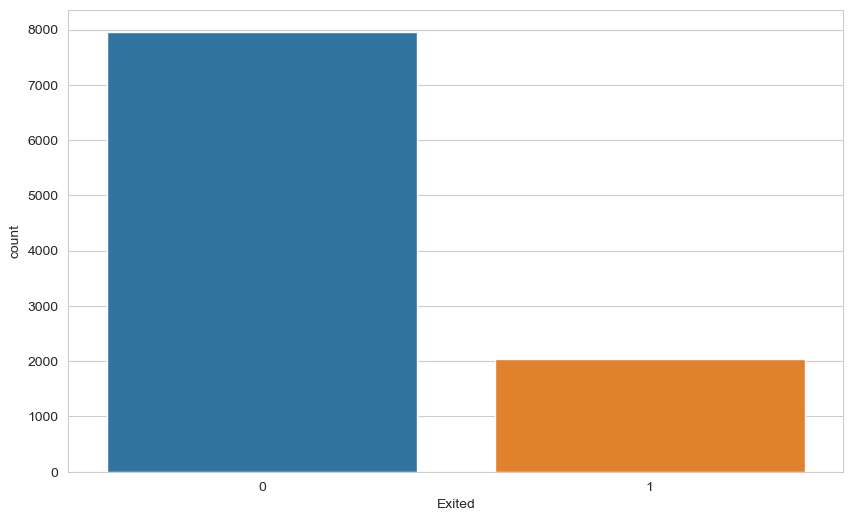

In [10]:
sns.countplot(x=df["Exited"])

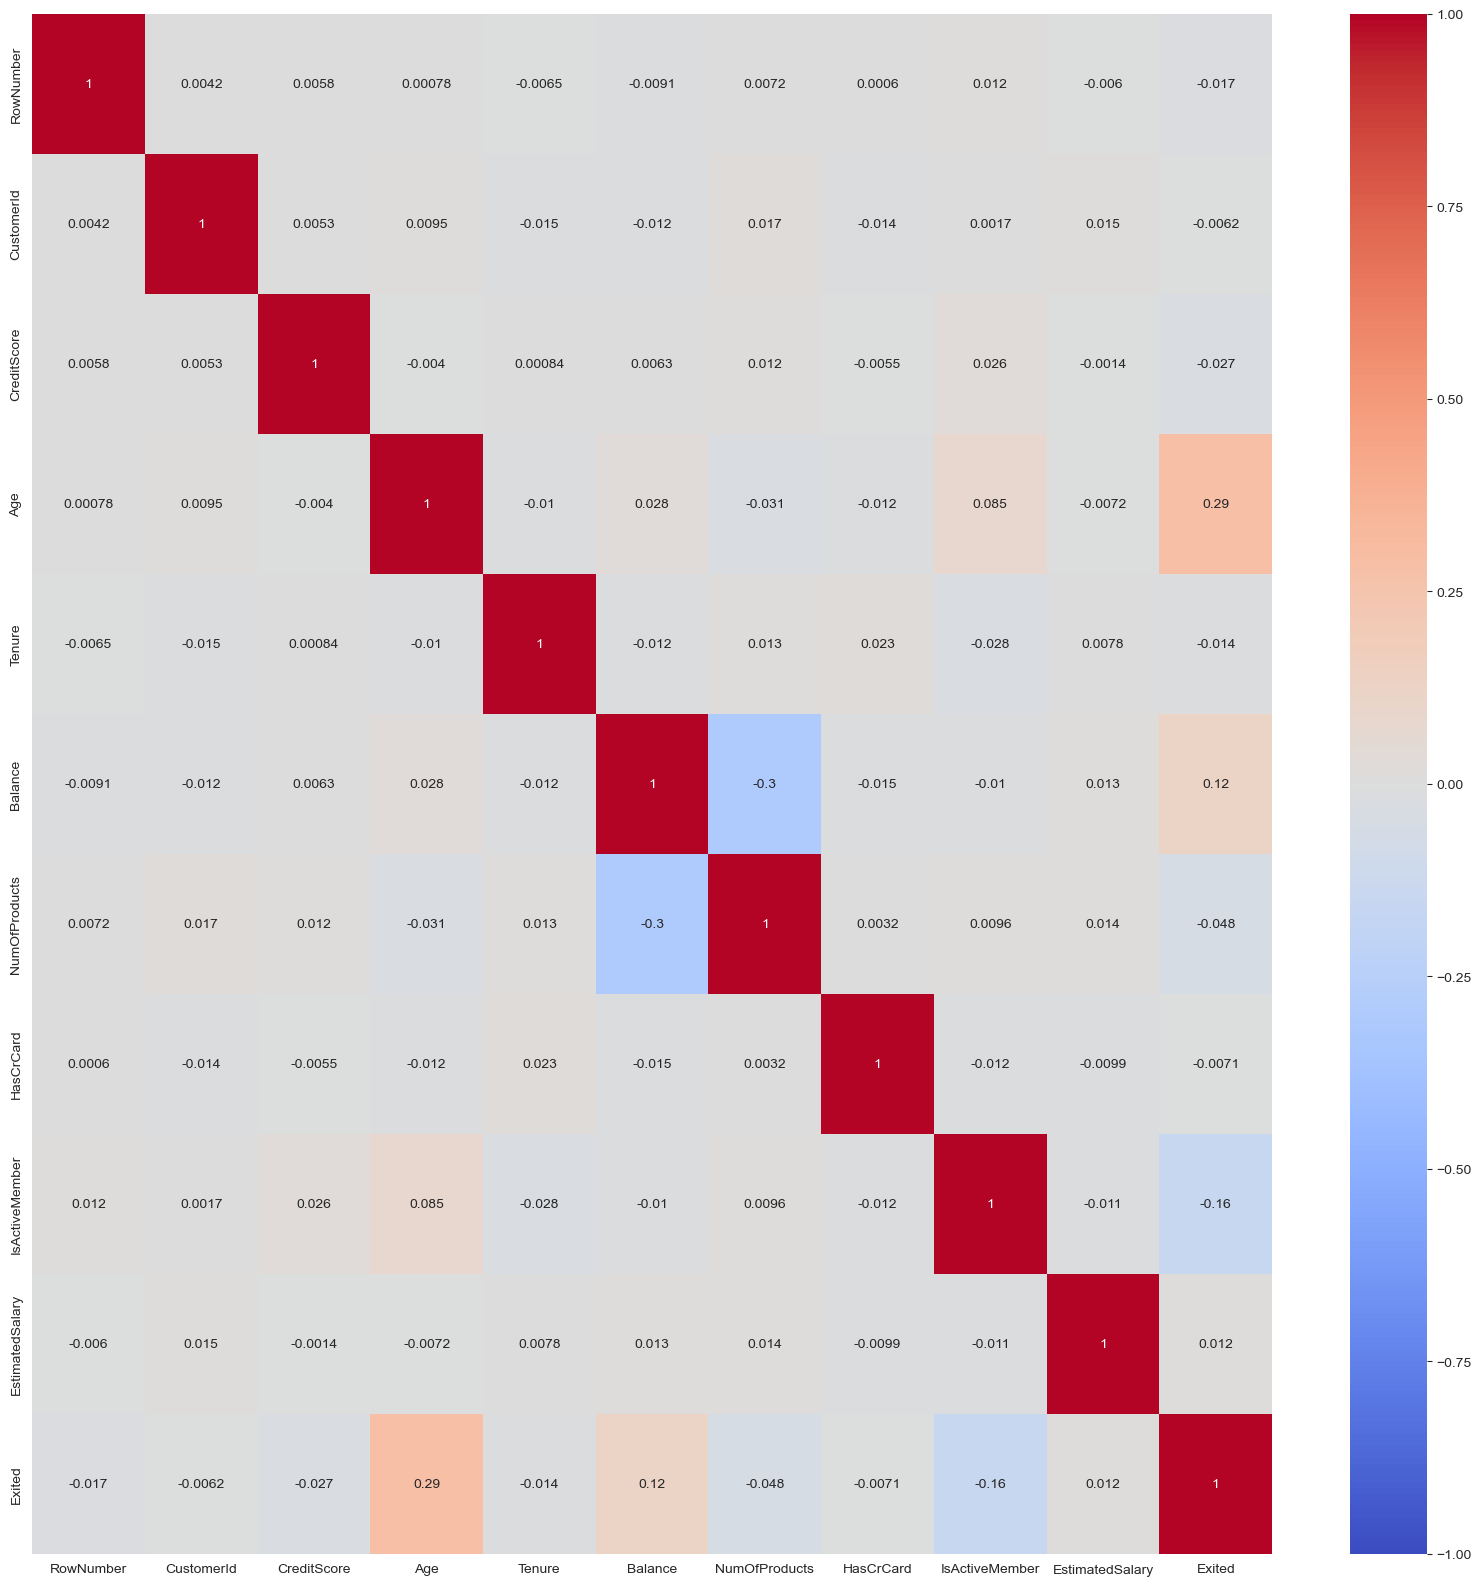

In [11]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(numeric_only=True), annot=True, vmin=-1, vmax=1, cmap="coolwarm")
plt.show()

In [12]:
drop_list = [
    'RowNumber', 'CustomerId', 'Surname'
]

In [13]:
df = df.drop(drop_list, axis=1)

In [14]:
df.shape

(10000, 11)

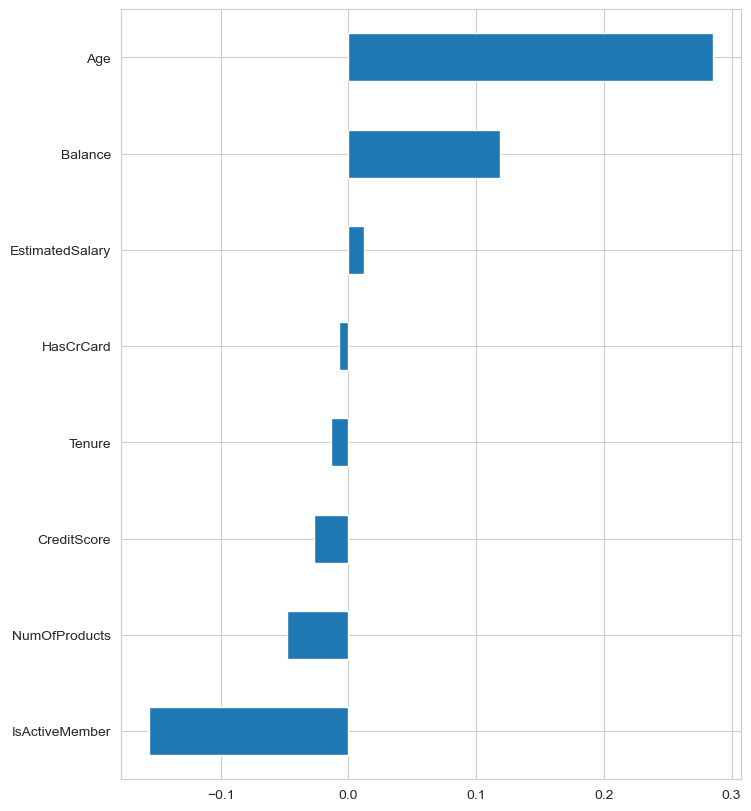

In [15]:
plt.figure(figsize=(8, 10))
(df.corr(numeric_only=True)["Exited"].sort_values().drop("Exited").plot(kind="barh"))
plt.show()

In [16]:
df.Geography.unique()

array(['France', 'Spain', 'Germany'], dtype=object)

# Preprocessing of Data
- Train | Test Split, Scalling

In [17]:

df = pd.get_dummies(df, columns = ['Geography', 'Gender']) 

In [18]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,1,True,False,False,True,False
1,608,41,1,83807.860,1,0,1,112542.580,0,False,False,True,True,False
2,502,42,8,159660.800,3,1,0,113931.570,1,True,False,False,True,False
3,699,39,1,0.000,2,0,0,93826.630,0,True,False,False,True,False
4,850,43,2,125510.820,1,1,1,79084.100,0,False,False,True,True,False


In [19]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [20]:
seed = 42

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X,y , stratify=y, test_size=0.1, random_state=seed)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.1, random_state=seed)

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Modelling & Model Performance

## without class_weigth

### Create The Model

In [25]:
X_train.shape

(8100, 13)

In [26]:
X_test.shape

(1000, 13)

In [27]:
tf.random.set_seed(seed)

vanilla_model = Sequential()

vanilla_model.add(Dense(36, activation="relu"))
vanilla_model.add(Dense(18, activation="relu"))
vanilla_model.add(Dense(9, activation="relu"))
vanilla_model.add(Dense(1, activation="sigmoid"))

vanilla_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['Recall'])

In [28]:
vanilla_model.fit(
    x=X_train, y=y_train, batch_size=32, epochs=1000, verbose=1
)

Epoch 1/1000


2023-10-30 00:48:44.310150: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


254/254 [==============================] - 1s 760us/step - loss: 0.4910 - recall: 0.0036
Epoch 2/1000
254/254 [==============================] - 0s 690us/step - loss: 0.4501 - recall: 0.0685
Epoch 3/1000
254/254 [==============================] - 0s 670us/step - loss: 0.4312 - recall: 0.1745
Epoch 4/1000
254/254 [==============================] - 0s 666us/step - loss: 0.4244 - recall: 0.2412
Epoch 5/1000
254/254 [==============================] - 0s 726us/step - loss: 0.4177 - recall: 0.2624
Epoch 6/1000
254/254 [==============================] - 0s 735us/step - loss: 0.4107 - recall: 0.2921
Epoch 7/1000
254/254 [==============================] - 0s 708us/step - loss: 0.4022 - recall: 0.3152
Epoch 8/1000
254/254 [==============================] - 0s 697us/step - loss: 0.3869 - recall: 0.3461
Epoch 9/1000
254/254 [==============================] - 0s 690us/step - loss: 0.3745 - recall: 0.3800
Epoch 10/1000
254/254 [==============================] - 0s 1ms/step - loss: 0.3635 - recall: 0

In [29]:
vanilla_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 36)                504       
                                                                 
 dense_1 (Dense)             (None, 18)                666       
                                                                 
 dense_2 (Dense)             (None, 9)                 171       
                                                                 
 dense_3 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [30]:
loss_df = pd.DataFrame(vanilla_model.history.history)
loss_df.head()

,loss,recall
0,0.491,0.004
1,0.450,0.068
2,0.431,0.175
3,0.424,0.241
4,0.418,0.262


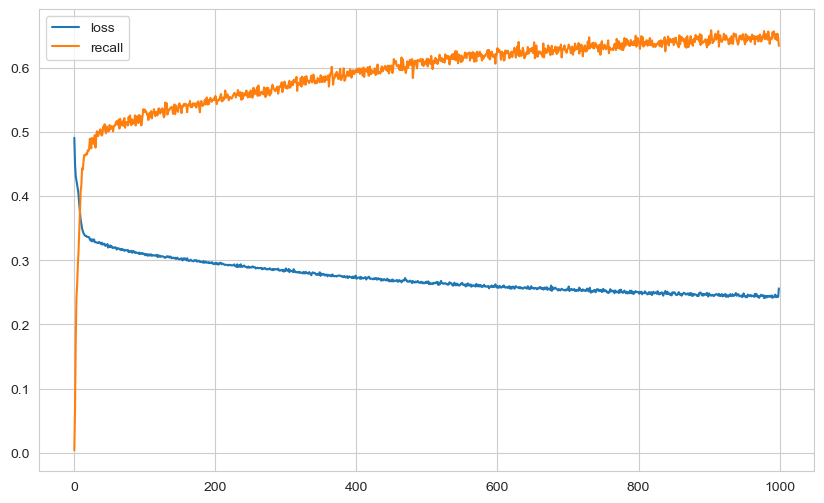

In [31]:
loss_df.plot()
plt.show()

In [32]:
vanilla_model.evaluate(X_train, y_train, verbose=0)

[0.23271353542804718, 0.6399999856948853]

In [33]:
loss, Recall   = vanilla_model.evaluate(X_train, y_train, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)



loss:  0.23271353542804718
Recall:  0.6399999856948853


In [34]:
y_pred = vanilla_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 467us/step
[[747  49]
 [102 102]]
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       796
           1       0.68      0.50      0.57       204

    accuracy                           0.85      1000
   macro avg       0.78      0.72      0.74      1000
weighted avg       0.84      0.85      0.84      1000



 1/32 [..............................] - ETA: 0s

32/32 [==============================] - 0s 612us/step


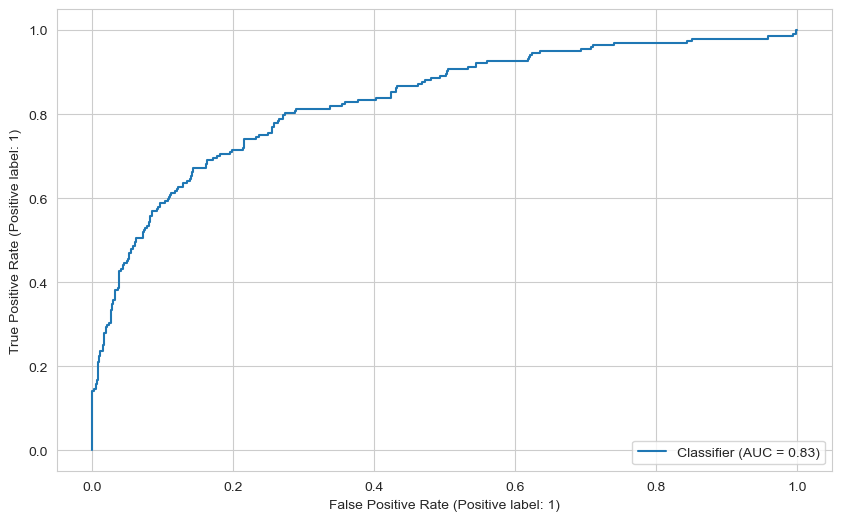

In [35]:
y_pred_proba = vanilla_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [36]:
roc_auc_score(y_test, y_pred_proba)

0.832200216770125

## with class_weigth

Investigate how the "class_weight" hyper-parameter is used in a Neural Network.

In [37]:
from sklearn.utils import class_weight
sklearn_weights = class_weight.compute_class_weight('balanced', y=df['Exited'],classes=np.unique(y))
sklearn_weights

array([0.62790406, 2.45459008])

In [38]:
print(f'The weights for the majority class is {sklearn_weights[0]:.3f}')
print(f'The weights for the minority class is {sklearn_weights[1]:.3f}')

The weights for the majority class is 0.628
The weights for the minority class is 2.455


### Create The Model

In [39]:
tf.random.set_seed(seed)
weights_model = Sequential()

weights_model.add(Dense(36, activation="relu"))
weights_model.add(Dense(18, activation="relu"))
weights_model.add(Dense(9, activation="relu"))
weights_model.add(Dense(1, activation="sigmoid"))

weights_model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["Recall"])

In [40]:
weights_model.fit(
    x=X_train, y=y_train, batch_size=32, epochs=1000, verbose=1, class_weight= {0: 0.628 , 1: 2.455}
)

Epoch 1/1000
254/254 [==============================] - 1s 793us/step - loss: 0.6461 - recall: 0.5691
Epoch 2/1000
254/254 [==============================] - 0s 911us/step - loss: 0.6030 - recall: 0.6782
Epoch 3/1000
254/254 [==============================] - 0s 808us/step - loss: 0.5729 - recall: 0.6885
Epoch 4/1000
254/254 [==============================] - 0s 738us/step - loss: 0.5440 - recall: 0.7170
Epoch 5/1000
254/254 [==============================] - 0s 724us/step - loss: 0.5107 - recall: 0.7315
Epoch 6/1000
254/254 [==============================] - 0s 734us/step - loss: 0.4929 - recall: 0.7467
Epoch 7/1000
254/254 [==============================] - 0s 730us/step - loss: 0.4872 - recall: 0.7461
Epoch 8/1000
254/254 [==============================] - 0s 722us/step - loss: 0.4783 - recall: 0.7515
Epoch 9/1000
254/254 [==============================] - 0s 721us/step - loss: 0.4763 - recall: 0.7467
Epoch 10/1000
254/254 [==============================] - 0s 749us/step - loss: 0.4

In [41]:
weights_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 36)                504       
                                                                 
 dense_5 (Dense)             (None, 18)                666       
                                                                 
 dense_6 (Dense)             (None, 9)                 171       
                                                                 
 dense_7 (Dense)             (None, 1)                 10        
                                                                 
Total params: 1,351
Trainable params: 1,351
Non-trainable params: 0
_________________________________________________________________


### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [42]:
loss_df = pd.DataFrame(weights_model.history.history)
loss_df.head()

,loss,recall
0,0.646,0.569
1,0.603,0.678
2,0.573,0.688
3,0.544,0.717
4,0.511,0.732


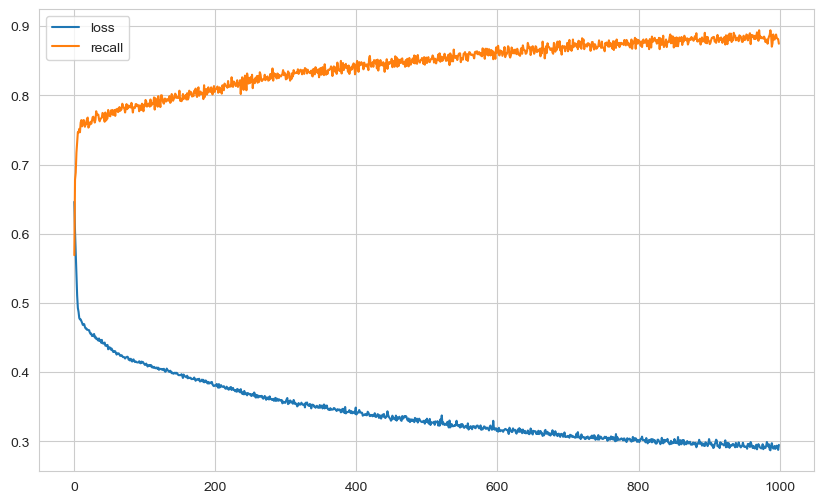

In [43]:
loss_df.plot()
plt.show()

In [44]:
weights_model.evaluate(X_train, y_train, verbose=0)

[0.2764189839363098, 0.8860605955123901]

In [45]:
loss, Recall = weights_model.evaluate(X_train, y_train, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)


loss:  0.2764189839363098
Recall:  0.8860605955123901


In [46]:
y_pred = weights_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 464us/step
[[649 147]
 [ 68 136]]
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       796
           1       0.48      0.67      0.56       204

    accuracy                           0.79      1000
   macro avg       0.69      0.74      0.71      1000
weighted avg       0.82      0.79      0.80      1000



## Implementation Different Methods to Develop The Model

- Implement the following methods on model creating with "class_weight" parameter
- Create and evaluate model for each method 

### Increase The Learning Rate and Observe The Results

In [47]:
tf.random.set_seed(seed)

lr_model = Sequential()

lr_model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
lr_model.add(Dense(18, activation="relu"))
lr_model.add(Dense(9, activation="relu"))
lr_model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
lr_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [48]:
lr_model.fit(
    x=X_train, y=y_train, batch_size=32, epochs=1000, verbose=1, class_weight= {0: 0.628 , 1: 2.455}
)

Epoch 1/1000
254/254 [==============================] - 1s 822us/step - loss: 0.6263 - recall: 0.6636
Epoch 2/1000
254/254 [==============================] - 0s 990us/step - loss: 0.5566 - recall: 0.7515
Epoch 3/1000
254/254 [==============================] - 0s 754us/step - loss: 0.5118 - recall: 0.7552
Epoch 4/1000
254/254 [==============================] - 0s 741us/step - loss: 0.4863 - recall: 0.7685
Epoch 5/1000
254/254 [==============================] - 0s 722us/step - loss: 0.4761 - recall: 0.7552
Epoch 6/1000
254/254 [==============================] - 0s 719us/step - loss: 0.4769 - recall: 0.7461
Epoch 7/1000
254/254 [==============================] - 0s 724us/step - loss: 0.4652 - recall: 0.7600
Epoch 8/1000
254/254 [==============================] - 0s 723us/step - loss: 0.4616 - recall: 0.7442
Epoch 9/1000
254/254 [==============================] - 0s 724us/step - loss: 0.4593 - recall: 0.7552
Epoch 10/1000
254/254 [==============================] - 0s 735us/step - loss: 0.4

<Axes: >

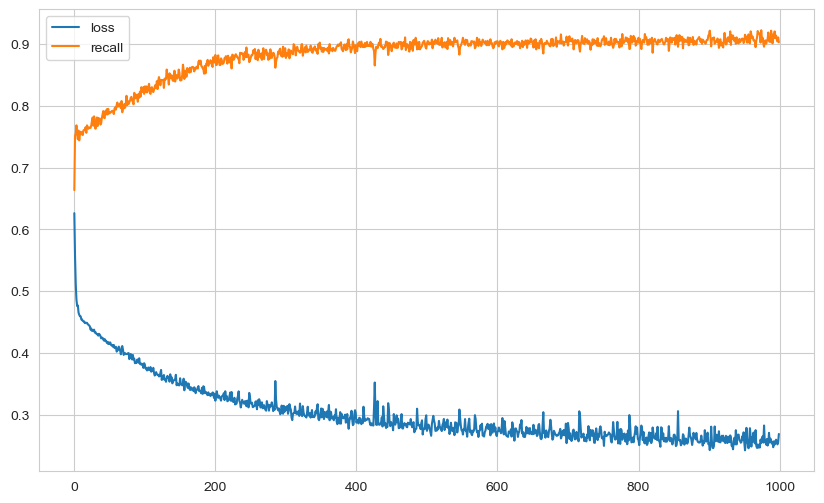

In [49]:
loss_df = pd.DataFrame(lr_model.history.history)
loss_df.plot()

In [50]:
loss, Recall = lr_model.evaluate(X_train, y_train, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.26129329204559326
Recall:  0.9084848761558533


In [51]:
y_pred = lr_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 466us/step
[[611 185]
 [ 59 145]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.83       796
           1       0.44      0.71      0.54       204

    accuracy                           0.76      1000
   macro avg       0.68      0.74      0.69      1000
weighted avg       0.82      0.76      0.77      1000



### Add Dropout Layer

In [52]:
tf.random.set_seed(seed)

dropout_model = Sequential()

dropout_model.add(Dense(36, activation="relu", input_dim=X_train.shape[1]))
dropout_model.add(Dropout(0.5))

dropout_model.add(Dense(18, activation="relu"))
dropout_model.add(Dropout(0.5))

dropout_model.add(Dense(9, activation="relu"))
dropout_model.add(Dropout(0.5))

dropout_model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
dropout_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [53]:
dropout_model.fit(
    x=X_train, y=y_train, batch_size=32, epochs=1000, verbose=1, class_weight= {0: 0.628 , 1: 2.455}
)

Epoch 1/1000
254/254 [==============================] - 1s 1ms/step - loss: 0.6819 - recall: 0.4818
Epoch 2/1000
254/254 [==============================] - 0s 849us/step - loss: 0.6570 - recall: 0.5248
Epoch 3/1000
254/254 [==============================] - 0s 793us/step - loss: 0.6332 - recall: 0.5479
Epoch 4/1000
254/254 [==============================] - 0s 779us/step - loss: 0.6233 - recall: 0.5521
Epoch 5/1000
254/254 [==============================] - 0s 793us/step - loss: 0.6069 - recall: 0.6067
Epoch 6/1000
254/254 [==============================] - 0s 786us/step - loss: 0.5891 - recall: 0.6255
Epoch 7/1000
254/254 [==============================] - 0s 793us/step - loss: 0.5809 - recall: 0.6152
Epoch 8/1000
254/254 [==============================] - 0s 781us/step - loss: 0.5799 - recall: 0.6194
Epoch 9/1000
254/254 [==============================] - 0s 780us/step - loss: 0.5675 - recall: 0.6279
Epoch 10/1000
254/254 [==============================] - 0s 805us/step - loss: 0.569

<Axes: >

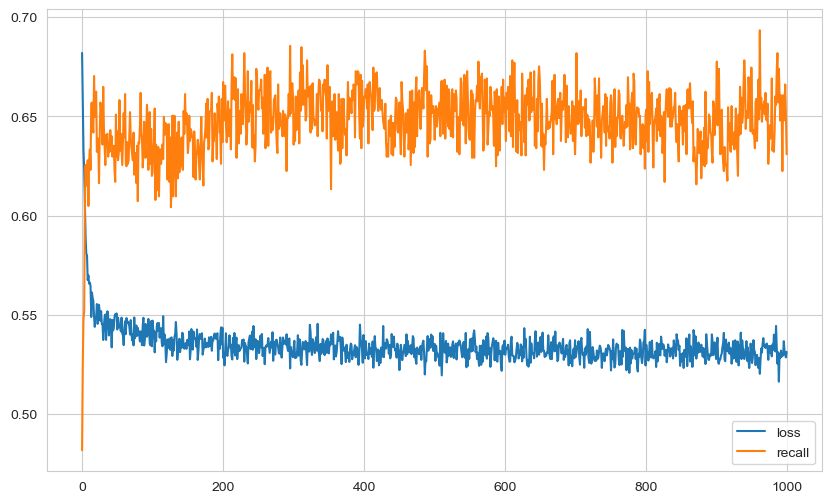

In [54]:
loss_df = pd.DataFrame(dropout_model.history.history)
loss_df.plot()

In [55]:
loss, Recall = dropout_model.evaluate(X_train, y_train, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.4356640577316284
Recall:  0.7030302882194519


In [56]:
y_pred = dropout_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 469us/step
[[677 119]
 [ 66 138]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88       796
           1       0.54      0.68      0.60       204

    accuracy                           0.81      1000
   macro avg       0.72      0.76      0.74      1000
weighted avg       0.83      0.81      0.82      1000



### Add Early Stop

#### Monitor the "val_loss" as metric

In [72]:
tf.random.set_seed(seed)

early_stop_model = Sequential()

early_stop_model.add(Dense(36, activation="relu"))
early_stop_model.add(Dropout(0.5))

early_stop_model.add(Dense(18, activation="relu"))
early_stop_model.add(Dropout(0.5))

early_stop_model.add(Dense(9, activation="relu"))
early_stop_model.add(Dropout(0.5))

early_stop_model.add(Dense(1, activation="sigmoid"))

opt = Adam(learning_rate=0.005)
early_stop_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

In [73]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15
)

#### Monitor the "val_recall" as metric

In [74]:
X_val = np.asarray(X_val).astype(np.float32)
y_val = np.asarray(y_val).astype(np.float32)

In [75]:

early_stop_model.fit(
    x=X_train, y=y_train, validation_data= (X_val,y_val) ,batch_size=128, epochs=1000, verbose=1, class_weight= {0: 0.628 , 1: 2.455}, callbacks=[early_stop])
    

Epoch 1/1000
64/64 [==============================] - 1s 3ms/step - loss: 0.6920 - recall: 0.5618 - val_loss: 2318.8623 - val_recall: 0.1585
Epoch 2/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.6760 - recall: 0.6473 - val_loss: 2274.9094 - val_recall: 0.3388
Epoch 3/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.6637 - recall: 0.6800 - val_loss: 2588.5005 - val_recall: 0.3497
Epoch 4/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.6492 - recall: 0.7067 - val_loss: 1514.7826 - val_recall: 0.3169
Epoch 5/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.6367 - recall: 0.6982 - val_loss: 1137.3839 - val_recall: 0.5956
Epoch 6/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.6273 - recall: 0.6945 - val_loss: 2297.7903 - val_recall: 0.2077
Epoch 7/1000
64/64 [==============================] - 0s 1ms/step - loss: 0.6115 - recall: 0.6891 - val_loss: 2788.8303 - val_recall: 0.4590
Epoch 8/1000


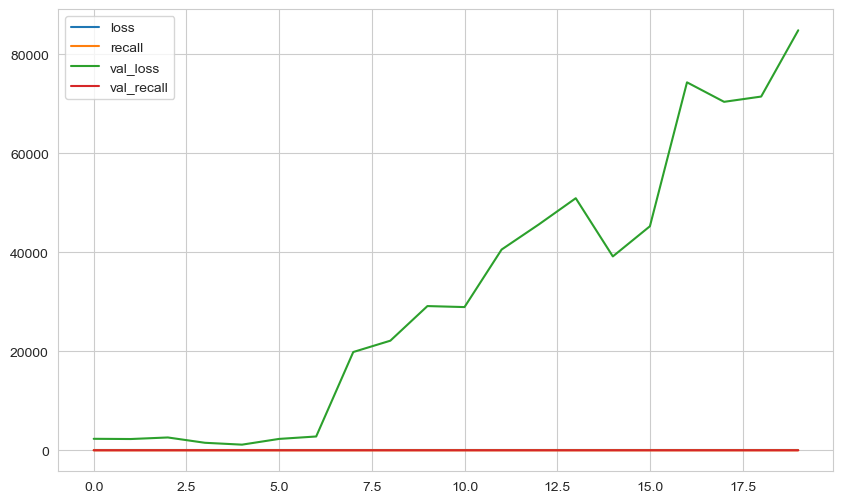

In [76]:
loss_df = pd.DataFrame(early_stop_model.history.history)
loss_df.plot()
plt.show()

In [77]:
loss, Recall = early_stop_model.evaluate(X_train, y_train, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.5448749661445618
Recall:  0.7951515316963196


In [78]:
y_pred = early_stop_model.predict(X_test) > 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 485us/step
[[577 219]
 [ 49 155]]
              precision    recall  f1-score   support

           0       0.92      0.72      0.81       796
           1       0.41      0.76      0.54       204

    accuracy                           0.73      1000
   macro avg       0.67      0.74      0.67      1000
weighted avg       0.82      0.73      0.76      1000



## optuna

In [83]:
early_stop = EarlyStopping(
    monitor="val_loss", mode="min", verbose=1, patience=15
)

In [84]:
trial_metric = "Recall"
batch_size = 64


def create_model(trial):
    # Some hyperparameters we want to optimize
    n_units1 = trial.suggest_int("n_units1", 8, 128)
    n_units2 = trial.suggest_int("n_units2", 8, 128)
    optimizer = trial.suggest_categorical("optimizer", [Adam, Adadelta, RMSprop, Nadam])
    learning_rate = trial.suggest_loguniform("learning_rate", 1e-5, 1.3e-1)

    tf.random.set_seed(42)
    model = Sequential()
    model.add(Dense(n_units1, input_dim=X_train.shape[1], activation="relu"))
    model.add(Dense(n_units2, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer(learning_rate=learning_rate),
        metrics=[trial_metric],
    )
    return model


def objective(trial):
    model = create_model(trial)
    w0 = trial.suggest_loguniform("w0", 0.01, 5)
    w1 = trial.suggest_loguniform("w1", 0.01, 5)
    model.fit(
        X_train,
        y_train,
        validation_data=(X_test, y_test),
        batch_size=batch_size,
        epochs=1000,
        callbacks=[early_stop],
        class_weight={0: w0, 1: w1},
        verbose=0,
    )
    score = model.evaluate(X_train, y_train, verbose=0)[1]
    return score

In [85]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)
study.best_params

[I 2023-10-30 01:29:00,551] A new study created in memory with name: no-name-995ef8dd-5d7f-49d8-8712-99f6cbbb45dd


Epoch 19: early stopping


[I 2023-10-30 01:29:03,971] Trial 0 finished with value: 0.7169696688652039 and parameters: {'n_units1': 110, 'n_units2': 45, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.08131229968504566, 'w0': 0.23284433749186603, 'w1': 1.225845749312728}. Best is trial 0 with value: 0.7169696688652039.


Epoch 767: early stopping


[I 2023-10-30 01:30:44,341] Trial 1 finished with value: 0.4981818199157715 and parameters: {'n_units1': 124, 'n_units2': 123, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.005040675597475668, 'w0': 0.2664182580383062, 'w1': 0.5679834989196805}. Best is trial 0 with value: 0.7169696688652039.


Epoch 36: early stopping


[I 2023-10-30 01:30:48,652] Trial 2 finished with value: 0.046060606837272644 and parameters: {'n_units1': 8, 'n_units2': 126, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.00900114426983333, 'w0': 4.148726577815859, 'w1': 0.098274373716529}. Best is trial 0 with value: 0.7169696688652039.


Epoch 180: early stopping


[I 2023-10-30 01:31:11,881] Trial 3 finished with value: 0.5424242615699768 and parameters: {'n_units1': 125, 'n_units2': 71, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 4.4752567848416666e-05, 'w0': 0.28640957396946365, 'w1': 0.38415672125097655}. Best is trial 0 with value: 0.7169696688652039.


Epoch 60: early stopping


[I 2023-10-30 01:31:19,439] Trial 4 finished with value: 0.29818183183670044 and parameters: {'n_units1': 14, 'n_units2': 79, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.00048220847570672903, 'w0': 0.053593927374655154, 'w1': 0.01841675670248619}. Best is trial 0 with value: 0.7169696688652039.


Epoch 53: early stopping


[I 2023-10-30 01:31:25,440] Trial 5 finished with value: 0.0 and parameters: {'n_units1': 13, 'n_units2': 59, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.060802834660739755, 'w0': 0.6336646264525383, 'w1': 0.011803950812956791}. Best is trial 0 with value: 0.7169696688652039.


Epoch 36: early stopping


[I 2023-10-30 01:31:30,390] Trial 6 finished with value: 0.05454545468091965 and parameters: {'n_units1': 119, 'n_units2': 105, 'optimizer': <class 'keras.optimizers.optimizer_experimental.rmsprop.RMSprop'>, 'learning_rate': 0.005926818452403909, 'w0': 3.4702843117608833, 'w1': 0.07562960814525209}. Best is trial 0 with value: 0.7169696688652039.


Epoch 22: early stopping


[I 2023-10-30 01:31:33,849] Trial 7 finished with value: 0.0 and parameters: {'n_units1': 87, 'n_units2': 97, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adadelta.Adadelta'>, 'learning_rate': 0.012196453526182016, 'w0': 0.251436658482264, 'w1': 0.14355979126437968}. Best is trial 0 with value: 0.7169696688652039.


Epoch 21: early stopping


[I 2023-10-30 01:31:37,557] Trial 8 finished with value: 0.038787879049777985 and parameters: {'n_units1': 124, 'n_units2': 90, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.015746995895506922, 'w0': 4.492425855554597, 'w1': 0.03062824833542765}. Best is trial 0 with value: 0.7169696688652039.


Epoch 37: early stopping


[I 2023-10-30 01:31:43,297] Trial 9 finished with value: 0.9872727394104004 and parameters: {'n_units1': 55, 'n_units2': 124, 'optimizer': <class 'keras.optimizers.optimizer_experimental.nadam.Nadam'>, 'learning_rate': 0.003087172856848571, 'w0': 0.023337274531284573, 'w1': 0.7334284186088994}. Best is trial 9 with value: 0.9872727394104004.


Epoch 16: early stopping


[I 2023-10-30 01:31:45,711] Trial 10 finished with value: 1.0 and parameters: {'n_units1': 47, 'n_units2': 12, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.0006312057162798601, 'w0': 0.010514351992474177, 'w1': 4.065955821762489}. Best is trial 10 with value: 1.0.


Epoch 16: early stopping


[I 2023-10-30 01:31:48,212] Trial 11 finished with value: 1.0 and parameters: {'n_units1': 46, 'n_units2': 11, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.0006389855377043142, 'w0': 0.011039197914734906, 'w1': 4.041397946457978}. Best is trial 10 with value: 1.0.


Epoch 16: early stopping


[I 2023-10-30 01:31:50,629] Trial 12 finished with value: 1.0 and parameters: {'n_units1': 49, 'n_units2': 14, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.00035161656812837623, 'w0': 0.012617867043401915, 'w1': 3.668111672812069}. Best is trial 10 with value: 1.0.


Epoch 69: early stopping


[I 2023-10-30 01:31:58,488] Trial 13 finished with value: 1.0 and parameters: {'n_units1': 40, 'n_units2': 8, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.0008809297919435881, 'w0': 0.010555110668928119, 'w1': 3.8066822230021433}. Best is trial 10 with value: 1.0.


Epoch 16: early stopping


[I 2023-10-30 01:32:00,977] Trial 14 finished with value: 1.0 and parameters: {'n_units1': 76, 'n_units2': 30, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.00014783578539848333, 'w0': 0.032104232662995585, 'w1': 4.984836635807844}. Best is trial 10 with value: 1.0.


Epoch 16: early stopping


[I 2023-10-30 01:32:03,531] Trial 15 finished with value: 1.0 and parameters: {'n_units1': 34, 'n_units2': 30, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 1.4784662050237135e-05, 'w0': 0.06290578554717066, 'w1': 1.8477911268766707}. Best is trial 10 with value: 1.0.


Epoch 37: early stopping


[I 2023-10-30 01:32:08,193] Trial 16 finished with value: 1.0 and parameters: {'n_units1': 65, 'n_units2': 26, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.0018090309935548078, 'w0': 0.010587341684321705, 'w1': 1.7636162740312837}. Best is trial 10 with value: 1.0.


Epoch 16: early stopping


[I 2023-10-30 01:32:10,689] Trial 17 finished with value: 1.0 and parameters: {'n_units1': 28, 'n_units2': 50, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.0001298673863447716, 'w0': 0.02297855060432172, 'w1': 2.26896891027464}. Best is trial 10 with value: 1.0.


Epoch 37: early stopping


[I 2023-10-30 01:32:15,314] Trial 18 finished with value: 0.9466666579246521 and parameters: {'n_units1': 95, 'n_units2': 20, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.001354474585742786, 'w0': 0.0716847892410101, 'w1': 0.9422308925178774}. Best is trial 10 with value: 1.0.


Epoch 37: early stopping


[I 2023-10-30 01:32:20,083] Trial 19 finished with value: 0.9666666388511658 and parameters: {'n_units1': 63, 'n_units2': 43, 'optimizer': <class 'keras.optimizers.optimizer_experimental.adam.Adam'>, 'learning_rate': 0.0006825493261836852, 'w0': 0.016936693566576958, 'w1': 0.3674675855434919}. Best is trial 10 with value: 1.0.


{'n_units1': 47,
 'n_units2': 12,
 'optimizer': keras.optimizers.optimizer_experimental.adam.Adam,
 'learning_rate': 0.0006312057162798601,
 'w0': 0.010514351992474177,
 'w1': 4.065955821762489}

In [86]:
# build model with optuna parameters
unit1, unit2, optimizer, lr, w0, w1 = (
    study.best_params["n_units1"],
    study.best_params["n_units2"],
    study.best_params["optimizer"],
    study.best_params["learning_rate"],
    study.best_params["w0"],
    study.best_params["w1"],
)
tf.random.set_seed(42)
optuna_model = Sequential()
optuna_model.add(Dense(unit1, activation="relu"))
optuna_model.add(Dense(unit2, activation="relu"))
optuna_model.add(Dense(1, activation="sigmoid"))
opt = optimizer(learning_rate=lr)
optuna_model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["Recall"])

# train model
optuna_model.fit(
    X_train,
    y_train,
    validation_data=(X_val,y_val),
    batch_size=64,
    epochs=1000,
    callbacks=[early_stop],
    verbose=1,
)

Epoch 1/1000
127/127 [==============================] - 1s 2ms/step - loss: 0.5931 - recall: 0.1879 - val_loss: 4457.5024 - val_recall: 0.0000e+00
Epoch 2/1000
127/127 [==============================] - 0s 871us/step - loss: 0.4774 - recall: 0.0000e+00 - val_loss: 3098.0994 - val_recall: 0.0164
Epoch 3/1000
127/127 [==============================] - 0s 866us/step - loss: 0.4656 - recall: 0.0145 - val_loss: 2693.8716 - val_recall: 0.3497
Epoch 4/1000
127/127 [==============================] - 0s 870us/step - loss: 0.4573 - recall: 0.0733 - val_loss: 5020.1367 - val_recall: 0.6284
Epoch 5/1000
127/127 [==============================] - 0s 871us/step - loss: 0.4477 - recall: 0.1164 - val_loss: 6646.0415 - val_recall: 0.6448
Epoch 6/1000
127/127 [==============================] - 0s 868us/step - loss: 0.4382 - recall: 0.1315 - val_loss: 6601.6855 - val_recall: 0.6776
Epoch 7/1000
127/127 [==============================] - 0s 1ms/step - loss: 0.4271 - recall: 0.1661 - val_loss: 8891.1396 - 

In [88]:
optuna.visualization.plot_optimization_history(study)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'mode': 'markers',
              'name': 'Objective Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19],
              'y': [0.7169696688652039, 0.4981818199157715, 0.046060606837272644,
                    0.5424242615699768, 0.29818183183670044, 0.0,
                    0.05454545468091965, 0.0, 0.038787879049777985,
                    0.9872727394104004, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
                    0.9466666579246521, 0.9666666388511658]},
             {'mode': 'lines',
              'name': 'Best Value',
              'type': 'scatter',
              'x': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17,
                    18, 19],
              'y': [0.7169696688652039, 0.7169696688652039, 0.7169696688652039,
                    0.7169696688652039, 0.7169696688652039, 0.7169696688652039,
                    0.7169696688652039, 0.7169696688652039, 0.7169696688652039,
                    0.9872727394104004, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,
                    1.0, 1.0]},
             {'marker': {'color': '#cccccc'},
              'mode': 'markers',
              'name': 'Infeasible Trial',
              'showlegend': False,
              'type': 'scatter',
              'x': [],
              'y': []}],
    'layout': {'template': '...',
               'title': {'text': 'Optimization History Plot'},
               'xaxis': {'title': {'text': 'Trial'}},
               'yaxis': {'title': {'text': 'Objective Value'}}}
})

### Evaluate The Model

- Plot the model history to observe the changing of metrics
- Make prediction to see "confusion matrix" and "classification report"
- Check ROC (Receiver Operating Curve) and AUC (Area Under Curve) for the model

In [89]:
history = optuna_model.history.history

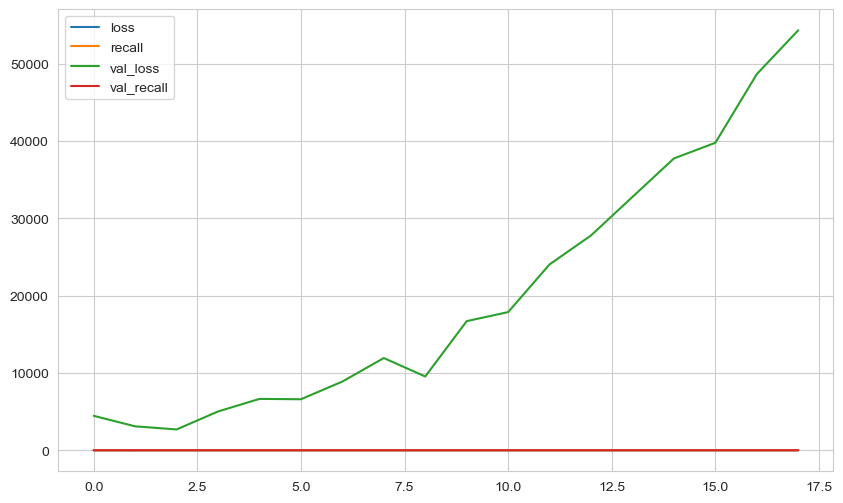

In [90]:
loss_df = pd.DataFrame(optuna_model.history.history)
loss_df.plot()
plt.show()

In [91]:
loss, Recall = optuna_model.evaluate(X_train, y_train, verbose=0)
print("loss: ", loss)
print("Recall: ", Recall)

loss:  0.35482510924339294
Recall:  0.43515151739120483


In [92]:
y_pred = (optuna_model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

32/32 [==============================] - 0s 561us/step
[[761  35]
 [114  90]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91       796
           1       0.72      0.44      0.55       204

    accuracy                           0.85      1000
   macro avg       0.79      0.70      0.73      1000
weighted avg       0.84      0.85      0.84      1000



 1/32 [..............................] - ETA: 0s

32/32 [==============================] - 0s 532us/step


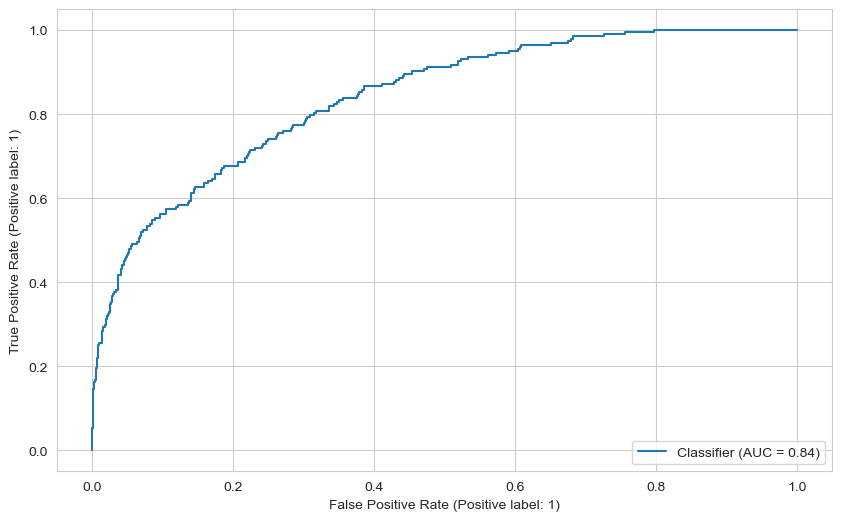

In [93]:
y_pred_proba = optuna_model.predict(X_test)
RocCurveDisplay.from_predictions(y_test, y_pred_proba)

In [94]:
roc_auc_score(y_test, y_pred_proba)

0.8394238348605774

# Final Model and Model Deployment

Choose the best recall model, the 'early stop model' with 76 recall for minority class and 41 precision.

In [96]:
early_stop_model.save("model_churn.h5")

In [97]:
model_ChurnPrediction = load_model("model_churn.h5")
pickle.dump(scaler, open("scaler_churn", "wb"))
scaler_churn = pickle.load(open("scaler_churn", "rb"))

## Prediction

In [98]:
custumer_churn = df.drop("Exited", axis=1).iloc[0:1, :]
custumer_churn

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619,42,2,0.000,1,1,1,101348.880,True,False,False,True,False


In [99]:
custumer_churn = scaler_churn.transform(custumer_churn)
custumer_churn

array([[0.538     , 0.32432432, 0.2       , 0.        , 0.        ,
        1.        , 1.        , 0.50654122, 1.        , 0.        ,
        0.        , 1.        , 0.        ]])

In [100]:
(model_ChurnPrediction.predict(custumer_churn) > 0.5).astype("int32")

1/1 [==============================] - 0s 113ms/step


array([[1]], dtype=int32)

In [101]:
df["Exited"].iloc[0]

1

In [102]:
df["Exited"].iloc[1]

0

The model predicted customer correct for both classes.

even though it still needs improvements.


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___